In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
import cv2
from skimage import exposure
from IPython.display import HTML
from IPython.display import clear_output

In [2]:
INPUT = 'data/'
DOT_DICTIONARY = {
    0: '#',
    1: '%',
    2: '*',
    3: '+',
    4: 'o',
    5: '|',
    6: ';',
    7: '^',
    8: '.',
    9: ' ',
}

In [12]:
def get_array(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    resized_image = cv2.resize(image, (shape_by_width * cell[1], shape_by_height * cell[0]))
    brightness_array = np.empty(shape=(shape_by_height, shape_by_width))
    for i in range(shape_by_height):
        for j in range(shape_by_width):
            brightness_array[i][j] = np.mean(resized_image[i * cell[0]:i * cell[0] + cell[0], j * cell[1]:j * cell[1] + cell[1]])
    return brightness_array


def get_array_easy_way(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    return cv2.resize(image, (shape_by_width, shape_by_height))
  
    
def equalize(array):
    return exposure.equalize_hist(array)


def normalize(array, new_min, new_max): 
    return new_min + (new_max - new_min) * (array - array.min()) / (array.max() - array.min()) 
    
    
def rounded(array):
    return array.round().astype('int')
    
        
def image_read(filename):
    return cv2.imread(INPUT + filename)


def gif_read(filename):
    return cv2.VideoCapture(INPUT + filename) 
    
        
def image_transform(image, cell, shades):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness_array = get_array(grayscale_image, cell)
    equalize_array = equalize(brightness_array)
    normalized_array = normalize(equalize_array, 0, shades - 1)
    rounded_array = rounded(normalized_array)
    return rounded_array 


def dot_transform(image, dot_dictionary):
    return '\n'.join([''.join([dot_dictionary[shade] for shade in row]) for row in image])


def to_html(text):
    return HTML(f'<pre style="font-family: monospace; line-height: 10px;">{text}</pre>')


def to_pre(text):
    return HTML(f'<pre>{text}</pre>')


def gif_transform(filename, cell, shades, dictionary):
    gif = gif_read(filename) 
    gif_array = []
    while (gif.isOpened()): 
        _, frame = gif.read()
        if frame is None:
            break
        gif_array.append(dot_transform(image_transform(frame, cell, shades), dictionary))
    return gif_array
    

def show_image(image):
    plt.figure(figsize=(40,40))
    plt.imshow(image, cmap='gray')

In [4]:
to_html(dot_transform(image_transform(image_read('anime.jpg'), (8, 8), 10), DOT_DICTIONARY))

In [21]:
to_pre(dot_transform(image_transform(image_read('anime.jpg'), (20, 8), 10), DOT_DICTIONARY))

In [6]:
to_html(dot_transform(image_transform(image_read('cat.jpg'), (10, 10), 10), DOT_DICTIONARY))

In [20]:
gif = gif_transform('dance.gif', (8, 8), 10, DOT_DICTIONARY)
for _ in range(3):
    for pic in gif:
        clear_output(wait=True)
        display(to_html(pic))
        time.sleep(0.1)

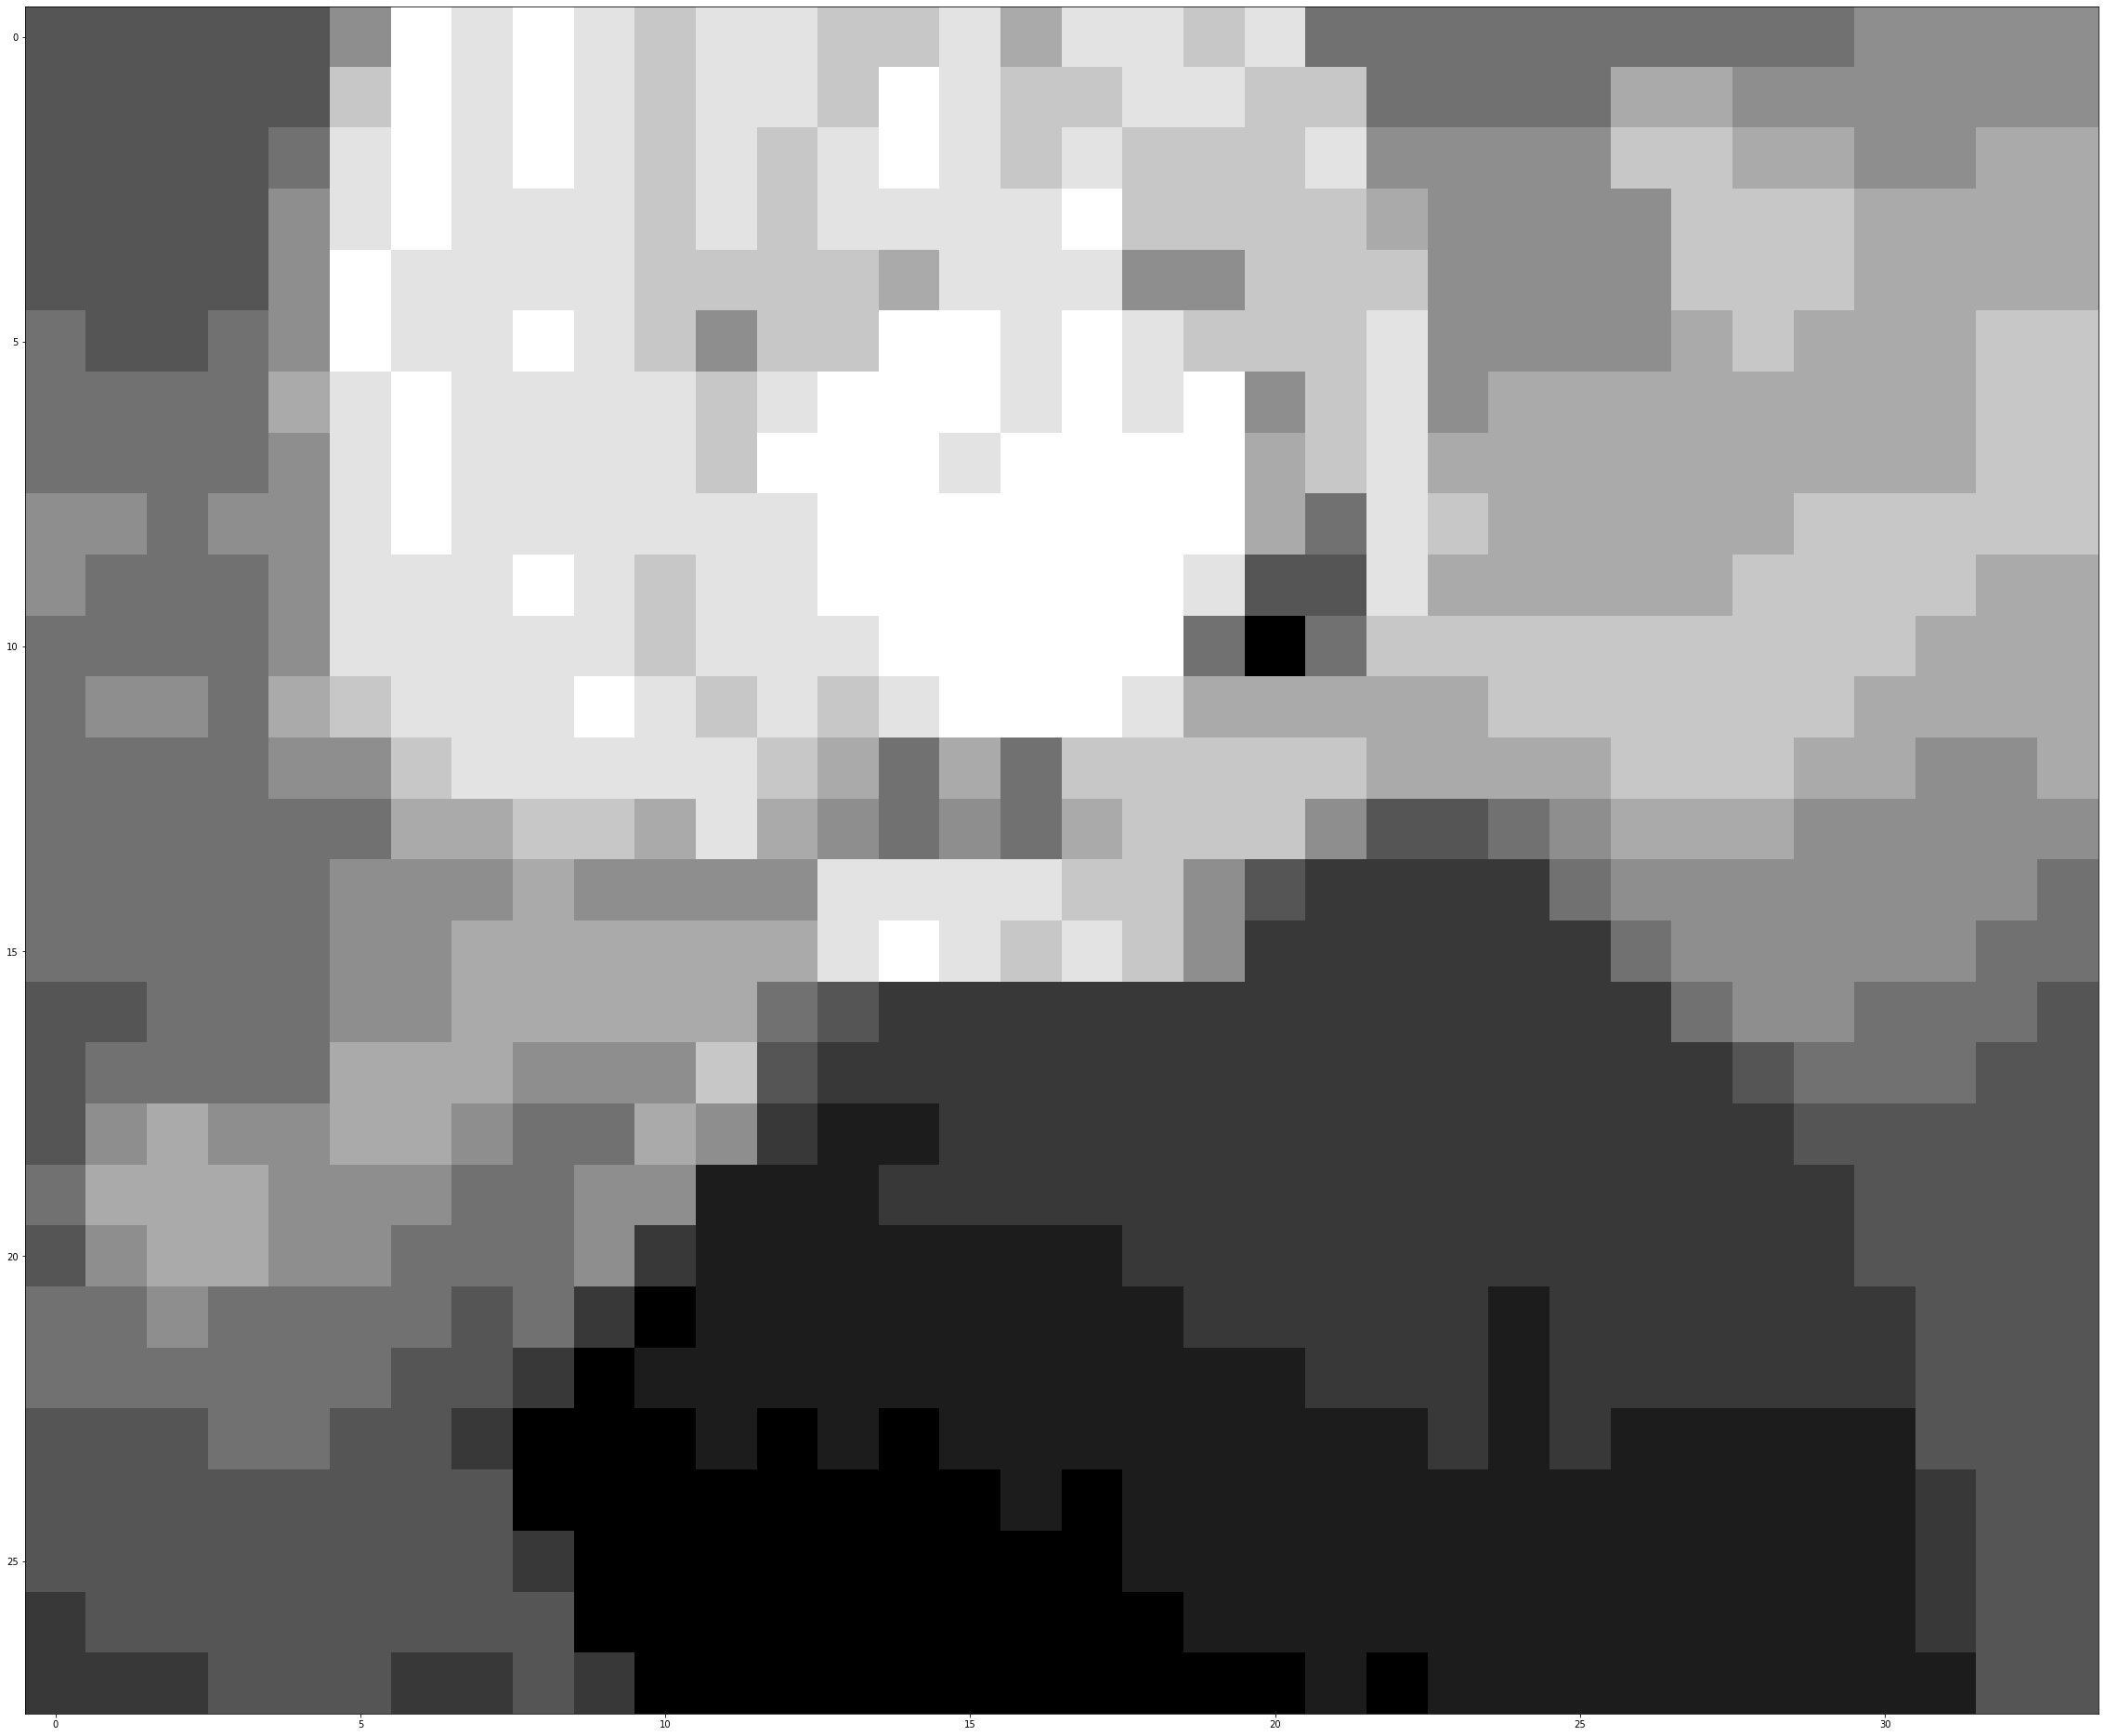

In [8]:
show_image(image_transform(image_read('anime.jpg'), (15, 15), 10))